# import Libraries 

In [1]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use("fivethirtyeight")
# Importing Required Functionality:
#- This line imports the `train_test_split` function from the `sklearn.model_selection` module.
#- The `train_test_split` function is commonly used in machine learning workflows to split datasets into training and testing subsets.


In [2]:
#Read the csv file into a DataFrame
df = pd.read_csv(r"tesla_price.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [6]:
#Make two new columns which will be used for making predictions.
df["HL_percent"] = (df["High"]-df["Low"]) / df["Low"] * 100
df["CO_percent"] = (df["Close"] - df["Open"]) / df["Open"] * 100

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,HL_percent,CO_percent
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,42.531349,25.736837
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,30.557946,-7.599848
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,27.873705,-12.160004
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,23.463395,-16.521735
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,26.342388,-19.449995


In [8]:
dates = np.array(df["Date"])
dates_check = dates[-30:]
dates = dates[:-30]
# Extracting Date Data:
# - This code extracts the "Date" column from the DataFrame `df` and converts it into a NumPy array using `np.array()`.

# Selecting Recent Dates for Checking:
# - dates_check = dates[-30:]`: This line selects the last 30 entries from the `dates` array, representing the most recent dates.

# Removing Recent Dates from the Original Data:
# - dates = dates[:-30]`: This line removes the last 30 entries from the `dates` array, effectively excluding the most recent dates.

In [9]:
df = df[["HL_percent", "CO_percent", "Adj Close", "Volume"]]

In [10]:
#Define the label column
df["PriceNextMonth"] = df["Adj Close"].shift(-30)
# Creating a Lagged Feature:
# - This line creates a new column in the DataFrame `df` named "PriceNextMonth".
# - The values for this column are derived from the "Adj Close" column of the DataFrame.
# - The `shift()` function is used to shift the values of the "Adj Close" column 30 rows backward (-30). This effectively creates a lagged feature where the "PriceNextMonth" column contains the closing prices of the asset 30 days into the future.
# - By shifting the values backward, each row in the "PriceNextMonth" column corresponds to the closing price of the asset 30 days ahead of the corresponding row in the "Adj Close" column.
# - This lagged feature can be used for predictive modeling tasks, where the goal is to predict future prices or trends based on historical data.

In [11]:
df.head()

,HL_percent,CO_percent,Adj Close,Volume,PriceNextMonth
0,42.531349,25.736837,23.889999,18766300,17.900000
1,30.557946,-7.599848,23.830000,17187100,17.600000
2,27.873705,-12.160004,21.959999,8218800,18.320000
3,23.463395,-16.521735,19.200001,5139800,18.780001
4,26.342388,-19.449995,16.110001,6866900,19.150000


In [12]:
df.tail()

,HL_percent,CO_percent,Adj Close,Volume,PriceNextMonth
1687,1.676418,0.551422,246.169998,3010700,NaN
1688,4.918296,4.831173,258.000000,7575500,NaN
1689,2.646791,-0.494165,255.729996,4816600,NaN
1690,2.582414,-0.133386,262.049988,7100400,NaN
1691,1.581154,-0.946970,261.500000,6475900,NaN


In [14]:
# Make Feature and Label Arrays

# Extracting Features:
X = np.array(df.drop(columns=["PriceNextMonth"]))
# - This line creates a feature array `X` by dropping the "PriceNextMonth" column from the DataFrame `df`.
# - The `drop()` function is used to remove the specified column. Here, `columns` argument is explicitly specified to indicate dropping columns.
# - The resulting array contains the remaining columns as features for the predictive model.

# Scaling Features:
X = preprocessing.scale(X)
# - The feature array `X` is scaled using the `preprocessing.scale()` function from scikit-learn.
# - Scaling standardizes the features by removing the mean and scaling to unit variance, which can improve the performance of certain machine learning algorithms.

# Selecting Recent Features for Checking:
X_Check = X[-30:]
# - This line selects the last 30 rows from the scaled feature array `X` to be used for checking or validation.
# - These recent features are stored in the variable `X_Check` for further examination.

# Removing Rows with NaN Values:
df.dropna(inplace=True)
# - This line removes any rows with missing values (NaN) from the DataFrame `df`.
# - Dropping rows with missing values ensures that the feature and label arrays are complete and consistent for modeling.

# Extracting Labels:
y = np.array(df["PriceNextMonth"])
# - The label array `y` is created by extracting the "PriceNextMonth" column from the DataFrame `df`.
# - The resulting array contains the target variable (labels) to be predicted by the model.


In [16]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1692, 4)
Shape of y: (1662,)


In [17]:
# Aligning X and y based on indices
common_indices = np.intersect1d(np.arange(X.shape[0]), np.arange(y.shape[0]))
X= X[common_indices]
y= y[common_indices]

# After alignment, X_aligned and y_aligned should have the same number of samples
print("Shape of X_aligned:", X.shape)
print("Shape of y_aligned:", y.shape)



Shape of X_aligned: (1662, 4)
Shape of y_aligned: (1662,)


In [18]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# Splitting Data:
# - This line splits the feature and label arrays (`X` and `y`) into training and testing subsets.
# - The `train_test_split()` function from scikit-learn is used for this purpose.
# - The parameter `test_size=0.2` specifies that 20% of the data will be reserved for testing, while the remaining 80% will be used for training.
# - The resulting subsets are:
#   - `X_train`: Features for training the model.
#   - `X_test`: Features for testing the model.
#   - `y_train`: Labels for training the model.
#   - `y_test`: Labels for testing the model.

In [19]:
#Define the prediction model
model = RandomForestRegressor()

In [20]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9608597547746179


In [22]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [23]:
predictions = model.predict(X_Check)

In [26]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
# Assuming 'dates' contains dates for actual data and 'dates_check' contains dates for forecast data
# and 'predictions' contains the forecasted values

# Create DataFrame for actual data
actual = pd.DataFrame(dates, columns=["Date"])
# - This line creates a DataFrame 'actual' using the dates from the 'dates' array as the 'Date' column.
# - 'dates' should be a list or array containing date values for actual data.
actual["ClosePrice"] = df["Adj Close"]  # Assuming 'df' contains the DataFrame with 'Adj Close' column
# - Adds a column 'ClosePrice' to the 'actual' DataFrame, containing the actual close prices from the DataFrame 'df'.
# - 'df["Adj Close"]' is assumed to contain the actual close prices.
actual["Forecast"] = np.nan
# - Adds a column 'Forecast' to the 'actual' DataFrame, initialized with NaN values as there are no forecasts for actual data.
actual.set_index("Date", inplace=True)
# - Sets the index of the 'actual' DataFrame to the 'Date' column.

# Create DataFrame for forecast data
forecast = pd.DataFrame(dates_check, columns=["Date"])
# - This line creates a DataFrame 'forecast' using the dates from the 'dates_check' array as the 'Date' column.
# - 'dates_check' should be a list or array containing date values for forecast data.
forecast["Forecast"] = predictions
# - Adds a column 'Forecast' to the 'forecast' DataFrame, containing the forecasted values from the 'predictions' array.
# - 'predictions' is assumed to contain the forecasted values.
forecast["ClosePrice"] = np.nan
# - Adds a column 'ClosePrice' to the 'forecast' DataFrame, initialized with NaN values as there are no close prices for forecast data.
forecast.set_index("Date", inplace=True)
# - Sets the index of the 'forecast' DataFrame to the 'Date' column.

# Concatenate actual and forecast DataFrames
result = pd.concat([actual, forecast])
# - Concatenates the 'actual' and 'forecast' DataFrames along the rows to create the final DataFrame 'result'.
# - 'result' now contains the combined data with dates, close prices, and forecasted values.


Text(0, 0.5, 'Price')

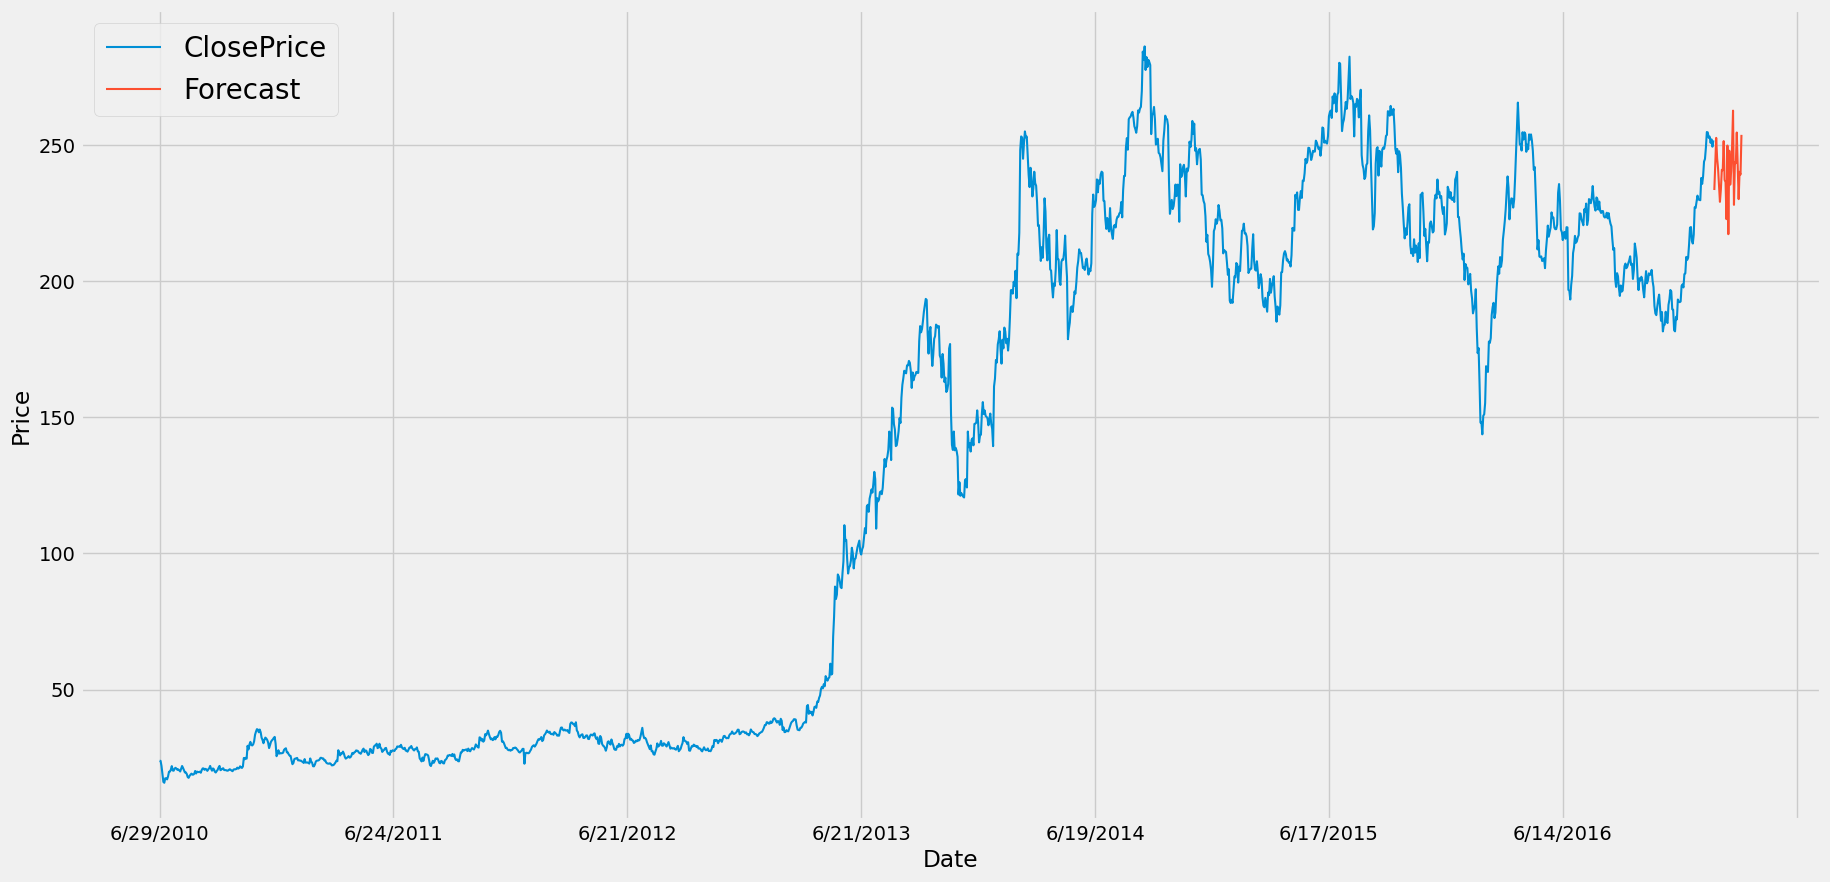

In [27]:
#Plot the final results
result.plot(figsize=(20, 10), linewidth=1.5)
# - Plots the data stored in the 'result' DataFrame.
# - 'figsize=(20, 10)' sets the figure size to 20x10 inches.
# - 'linewidth=1.5' sets the line width of the plot to 1.5.

plt.legend(loc=2, prop={'size': 20})
# - Adds a legend to the plot at location 2 (upper left corner).
# - 'prop={'size': 20}' sets the font size of the legend to 20.

plt.xlabel('Date')
# - Sets the label for the x-axis of the plot as 'Date'.

plt.ylabel('Price')
# - Sets the label for the y-axis of the plot as 'Price'.
